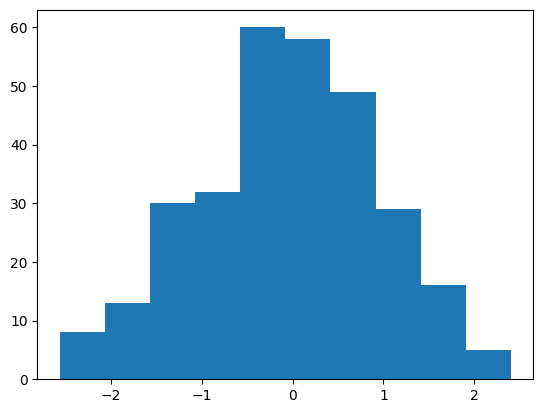

ShapiroResult(statistic=np.float64(0.9933461036487707), pvalue=np.float64(0.20635290959459207))


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

x = np.random.normal(size=300)
plt.hist(x)
plt.show()

print(shapiro(x))


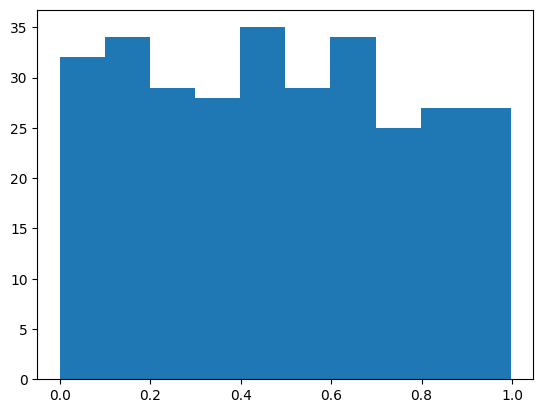

ShapiroResult(statistic=np.float64(0.9570574432096566), pvalue=np.float64(1.0173483338762873e-07))


In [5]:
y = np.random.uniform(size=300)
plt.hist(y)
plt.show()
print(shapiro(y))

In [7]:
import pandas as pd
import numpy as np
np.random.seed(42)

# Generate synthetic dataset
student_df = pd.DataFrame({
    'StudentID': range(1, 101),
    'Age': np.random.randint(17, 23, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Marks': np.random.normal(loc=70, scale=15, size=100).round(1),
    'City': np.random.choice(['Delhi', 'Mumbai', 'Chennai', 'Kolkata'], 100),
    'Attendance': np.random.choice([np.nan, 75, 80, 85, 90, 95], 100, p=[0.1, 0.2, 0.2, 0.2, 0.2, 0.1]),
    'StudyHours': np.random.normal(loc=15, scale=5, size=100).round(1)
})

#Understand the dataset
print(student_df.head(), end = "\n\n")
student_df.info()


   StudentID  Age Gender  Marks     City  Attendance  StudyHours
0          1   20   Male   90.6    Delhi        85.0         6.1
1          2   21   Male   72.6  Kolkata         NaN         8.9
2          3   19   Male   65.4  Kolkata         NaN        11.7
3          4   21   Male   80.1   Mumbai        90.0        20.8
4          5   21   Male   66.2    Delhi        80.0        22.8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   100 non-null    int64  
 1   Age         100 non-null    int32  
 2   Gender      100 non-null    object 
 3   Marks       100 non-null    float64
 4   City        100 non-null    object 
 5   Attendance  82 non-null     float64
 6   StudyHours  100 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 5.2+ KB


In [8]:
print(student_df.isnull().sum())

StudentID      0
Age            0
Gender         0
Marks          0
City           0
Attendance    18
StudyHours     0
dtype: int64


In [9]:
# Fill attendance with mean value
mean_attendance = student_df['Attendance'].mean()
student_df['Attendance'].fillna(mean_attendance, inplace=True)
print(student_df.head())


   StudentID  Age Gender  Marks     City  Attendance  StudyHours
0          1   20   Male   90.6    Delhi   85.000000         6.1
1          2   21   Male   72.6  Kolkata   83.841463         8.9
2          3   19   Male   65.4  Kolkata   83.841463        11.7
3          4   21   Male   80.1   Mumbai   90.000000        20.8
4          5   21   Male   66.2    Delhi   80.000000        22.8


C:\Users\pavan\AppData\Local\Temp\ipykernel_3204\2977414622.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_df['Attendance'].fillna(mean_attendance, inplace=True)


In [10]:
print(student_df.describe())

        StudentID         Age       Marks  Attendance  StudyHours
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    50.500000   19.690000   71.174000   83.841463   15.498000
std     29.011492    1.624901   14.418168    5.609281    5.075749
min      1.000000   17.000000   30.200000   75.000000    2.700000
25%     25.750000   18.000000   61.075000   80.000000   12.800000
50%     50.500000   20.000000   70.350000   83.841463   15.700000
75%     75.250000   21.000000   81.525000   85.000000   19.075000
max    100.000000   22.000000  111.000000   95.000000   26.400000


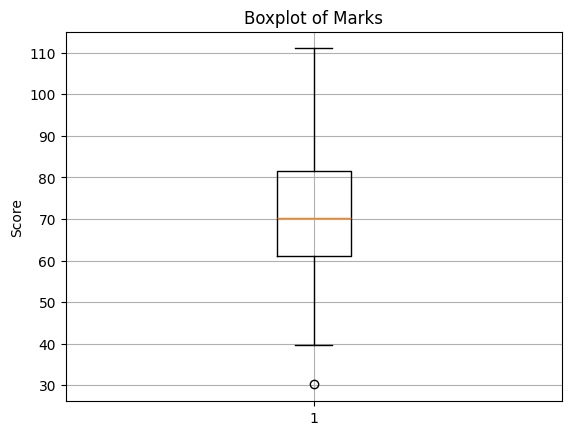

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(student_df['Marks'])
plt.title("Boxplot of Marks")
plt.ylabel("Score")
plt.grid()
plt.show()


In [12]:
print(student_df.groupby('Gender')['Marks'].mean())

Gender
Female    69.815385
Male      72.042623
Name: Marks, dtype: float64


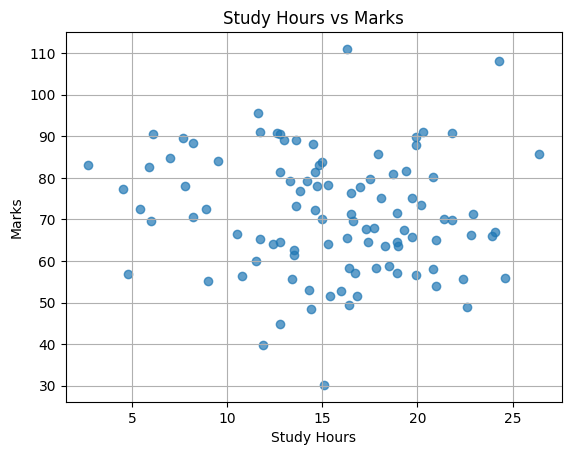

In [13]:
plt.scatter(student_df['StudyHours'], student_df['Marks'], alpha=0.7)
plt.title("Study Hours vs Marks")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.grid(True)
plt.show()
